In [1]:
import numpy as np
import os
from datetime import datetime
from dateutil.relativedelta import relativedelta
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pickle

import sys
from pathlib import Path

def find_repo_root(start: Path) -> Path:
    for p in [start] + list(start.parents):
        if (p / '.git').exists():
            return p
    return start

here = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
repo_root = find_repo_root(here)
sys.path.append(str(repo_root / 'common' / 'python' / 'io'))
sys.path.append(str(repo_root / 'projects' / 'matlab2python' / 'shared' / 'python'))
sys.path.append(str(repo_root / 'common' / 'python' / 'plotting'))
sys.path.append('../util/shared/python/')

EASE_PATH = repo_root / 'common' / 'python' / 'plotting' / 'ease_grids'

from read_GEOSldas import read_tilecoord, read_obs_param

from geospatial_plotting import plot_region, REGION_BOUNDS



In [2]:
species_groups = {
    "CYGNSS": [11],
    "SMAP": [4, 5, 6, 7],
    "ASCAT": [8, 9, 10],
    "SMOS": [0, 1, 2, 3]
}

# species_groups = {
#     "CYGNSS": [11],
#     "SMAP": [4, 5],
#     "ASCAT": [8, 9, 10],
#     "SMOS": [0, 1]
# }

In [3]:
# Read in the OL data files

stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/OLv8_M36_cd/' \
'OLv8_M36_cd/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_fixed_20180801_20240630.nc4'

print('reading stats nc4 file '+stats_file_OL)
stats_OL = {}
with Dataset(stats_file_OL,'r') as nc:
    for key, value in nc.variables.items():
        print(f"Reading variable: {key}")
        stats_OL[key] = value[:].filled(np.nan)

ts_stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/OLv8_M36_cd/' \
'OLv8_M36_cd/output/SMAP_EASEv2_M36_GLOBAL/figures/spatial_stats_OL_fixed_201808_202406.pkl'

with open(ts_stats_file_OL, 'rb') as f:
    loaded_data = pickle.load(f)
stats_dict_OL = loaded_data
date_vec_OL = loaded_data.get('date_vec', None)  
date_vec = date_vec_OL 

reading stats nc4 file /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/OLv8_M36_cd/OLv8_M36_cd/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_fixed_20180801_20240630.nc4
Reading variable: O_mean
Reading variable: O_stdv
Reading variable: F_mean
Reading variable: F_stdv
Reading variable: A_mean
Reading variable: A_stdv
Reading variable: OmF_mean
Reading variable: OmF_stdv
Reading variable: OmA_mean
Reading variable: OmA_stdv
Reading variable: OmF_norm_mean
Reading variable: OmF_norm_stdv
Reading variable: N_data


In [4]:
# Read in the DA data files
stats_file_DA = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd/' \
'DAv8_M36_cd/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_fixed_20180801_20240630.nc4'
print('reading stats nc4 file '+stats_file_DA)
stats_DA = {}
with Dataset(stats_file_DA,'r') as nc:
    for key, value in nc.variables.items():
        stats_DA[key] = value[:].filled(np.nan)

ts_stats_file_DA = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd/' \
'DAv8_M36_cd/output/SMAP_EASEv2_M36_GLOBAL/figures/spatial_stats_DA_fixed_201808_202406.pkl'

with open(ts_stats_file_DA, 'rb') as f:
    loaded_data = pickle.load(f)
stats_dict_DA = loaded_data
date_vec_DA = loaded_data.get('date_vec', None) 

reading stats nc4 file /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd/DAv8_M36_cd/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_fixed_20180801_20240630.nc4


In [5]:
# Read in the DA data files
stats_file_DA_all = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd_all/' \
'DAv8_M36_cd_all/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_fixed_20180801_20240630.nc4'
print('reading stats nc4 file '+stats_file_DA_all)
stats_DA_all = {}
with Dataset(stats_file_DA_all,'r') as nc:
    for key, value in nc.variables.items():
        stats_DA_all[key] = value[:].filled(np.nan)

ts_stats_file_DA_all = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd_all/' \
'DAv8_M36_cd_all/output/SMAP_EASEv2_M36_GLOBAL/figures/spatial_stats_DA_fixed_201808_202406.pkl'

with open(ts_stats_file_DA_all, 'rb') as f:
    loaded_data = pickle.load(f)
stats_dict_DA_all = loaded_data
date_vec_DA_all = loaded_data.get('date_vec', None) 

reading stats nc4 file /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd_all/DAv8_M36_cd_all/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_fixed_20180801_20240630.nc4


In [6]:
# Read in the DA data files
stats_file_DA_ssa = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd_ssa/' \
'DAv8_M36_cd_ssa/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_fixed_20180801_20240630.nc4'
print('reading stats nc4 file '+stats_file_DA_ssa)
stats_DA_ssa = {}
with Dataset(stats_file_DA_ssa,'r') as nc:
    for key, value in nc.variables.items():
        stats_DA_ssa[key] = value[:].filled(np.nan)

ts_stats_file_DA_ssa = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd_ssa/' \
'DAv8_M36_cd_ssa/output/SMAP_EASEv2_M36_GLOBAL/figures/spatial_stats_DA_fixed_201808_202406.pkl'

with open(ts_stats_file_DA_ssa, 'rb') as f:
    loaded_data = pickle.load(f)
stats_dict_DA_ssa = loaded_data
date_vec_DA_ssa = loaded_data.get('date_vec', None) 

reading stats nc4 file /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd_ssa/DAv8_M36_cd_ssa/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_fixed_20180801_20240630.nc4


In [7]:
# Sample of final compuation of selected diagnostic metrics for OL
 
Nmin = 20

# Then computer metrics of O-F, O-A, etc. based on above computed
N_data = stats_OL['N_data']
O_mean = stats_OL['O_mean']
A_mean = stats_OL['A_mean']
F_mean = stats_OL['F_mean']
O_stdv = stats_OL['O_stdv']
A_stdv = stats_OL['A_stdv']
F_stdv = stats_OL['F_stdv']
OmF_mean = stats_OL['OmF_mean']
OmF_stdv = stats_OL['OmF_stdv']
OmF_norm_mean = stats_OL['OmF_norm_mean']
OmF_norm_stdv = stats_OL['OmF_norm_stdv']
OmA_mean = stats_OL['OmA_mean']
OmA_stdv = stats_OL['OmA_stdv']
  
# Mask out data points with insufficent observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0

OmF_mean_OL = OmF_mean
OmF_stdv_OL = OmF_stdv
OmF_norm_mean_OL = OmF_norm_mean
OmF_norm_stdv_OL = OmF_norm_stdv
OmA_mean_OL = OmA_mean
OmA_stdv_OL = OmA_stdv
N_data_OL = N_data

group_metrics_OL = {}

for group, species_indices in species_groups.items():
    group_metrics_OL[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_OL[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['Nobs_data'] = group_N_data


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/3977554994.py:44: RuntimeWarning: invalid value encountered in divide
  group_metrics_OL[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/3977554994.py:45: RuntimeWarning: invalid value encountered in divide
  group_metrics_OL[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/3977554994.py:46: RuntimeWarning: invalid value encountered in divide
  group_metrics_OL[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/3977554994.py:47: RuntimeWarning: invalid value encountered in divide
  group_metrics_OL[group]['OmF_norm_stdv'] = np.nansum

In [8]:

# Sample of final compuation of selected diagnostic metrics for DA

# Then computer metrics of O-F, O-A, etc. based on above computed
N_data = stats_DA['N_data']
O_mean = stats_DA['O_mean']
A_mean = stats_DA['A_mean']
F_mean = stats_DA['F_mean']
O_stdv = stats_DA['O_stdv']
A_stdv = stats_DA['A_stdv']
F_stdv = stats_DA['F_stdv']
OmF_mean = stats_DA['OmF_mean']
OmF_stdv = stats_DA['OmF_stdv']
OmF_norm_mean = stats_DA['OmF_norm_mean']
OmF_norm_stdv = stats_DA['OmF_norm_stdv']
OmA_mean = stats_DA['OmA_mean']
OmA_stdv = stats_DA['OmA_stdv']

# Mask out data points with insufficent observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0
OmF_mean_DA = OmF_mean
OmF_stdv_DA = OmF_stdv
OmF_norm_mean_DA = OmF_norm_mean
OmF_norm_stdv_DA = OmF_norm_stdv
OmA_mean_DA = OmA_mean
OmA_stdv_DA = OmA_stdv
N_data_DA = N_data

group_metrics_DA = {}

for group, species_indices in species_groups.items():
    group_metrics_DA[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_DA[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['Nobs_data'] = group_N_data


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/4095136516.py:41: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/4095136516.py:42: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/4095136516.py:43: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/4095136516.py:44: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA[group]['OmF_norm_stdv'] = np.nansum

In [9]:
# Then computer metrics of O-F, O-A, etc. based on above computed
N_data = stats_DA_all['N_data']
O_mean = stats_DA_all['O_mean']
A_mean = stats_DA_all['A_mean']
F_mean = stats_DA_all['F_mean']
O_stdv = stats_DA_all['O_stdv']
A_stdv = stats_DA_all['A_stdv']
F_stdv = stats_DA_all['F_stdv']
OmF_mean = stats_DA_all['OmF_mean']
OmF_stdv = stats_DA_all['OmF_stdv']
OmF_norm_mean = stats_DA_all['OmF_norm_mean']
OmF_norm_stdv = stats_DA_all['OmF_norm_stdv']
OmA_mean = stats_DA_all['OmA_mean']
OmA_stdv = stats_DA_all['OmA_stdv']

# Mask out data points with insufficent observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0
OmF_mean_DA_all = OmF_mean
OmF_stdv_DA_all = OmF_stdv
OmF_norm_mean_DA_all = OmF_norm_mean
OmF_norm_stdv_DA_all = OmF_norm_stdv
OmA_mean_DA_all = OmA_mean
OmA_stdv_DA_all = OmA_stdv
N_data_DA_all = N_data

group_metrics_DA_all = {}

for group, species_indices in species_groups.items():
    group_metrics_DA_all[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_DA_all[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_all[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_all[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_all[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_all[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_all[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_all[group]['Nobs_data'] = group_N_data

/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/452541659.py:39: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA_all[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/452541659.py:40: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA_all[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/452541659.py:41: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA_all[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/452541659.py:42: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA_all[group]['OmF_norm_stdv']

In [10]:
# Then computer metrics of O-F, O-A, etc. based on above computed
N_data = stats_DA_ssa['N_data']
O_mean = stats_DA_ssa['O_mean']
A_mean = stats_DA_ssa['A_mean']
F_mean = stats_DA_ssa['F_mean']
O_stdv = stats_DA_ssa['O_stdv']
A_stdv = stats_DA_ssa['A_stdv']
F_stdv = stats_DA_ssa['F_stdv']
OmF_mean = stats_DA_ssa['OmF_mean']
OmF_stdv = stats_DA_ssa['OmF_stdv']
OmF_norm_mean = stats_DA_ssa['OmF_norm_mean']
OmF_norm_stdv = stats_DA_ssa['OmF_norm_stdv']
OmA_mean = stats_DA_ssa['OmA_mean']
OmA_stdv = stats_DA_ssa['OmA_stdv']

# Mask out data points with insufficent observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0
OmF_mean_DA_ssa = OmF_mean
OmF_stdv_DA_ssa = OmF_stdv
OmF_norm_mean_DA_ssa = OmF_norm_mean
OmF_norm_stdv_DA_ssa = OmF_norm_stdv
OmA_mean_DA_ssa = OmA_mean
OmA_stdv_DA_ssa = OmA_stdv
N_data_DA_ssa = N_data

group_metrics_DA_ssa = {}

for group, species_indices in species_groups.items():
    group_metrics_DA_ssa[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_DA_ssa[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_ssa[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_ssa[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_ssa[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_ssa[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_ssa[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA_ssa[group]['Nobs_data'] = group_N_data

/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/1084405669.py:39: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA_ssa[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/1084405669.py:40: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA_ssa[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/1084405669.py:41: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA_ssa[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/1084405669.py:42: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA_ssa[group]['OmF_norm_st

In [11]:
ftc = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd/' \
      'DAv8_M36_cd/output/SMAP_EASEv2_M36_GLOBAL/rc_out/DAv8_M36_cd.ldas_tilecoord.bin'
tc = read_tilecoord(ftc)
n_tile = tc['N_tile']
lat = tc['com_lat']
lon = tc['com_lon']

map_array = np.empty([n_tile, 3])
map_array.fill(np.nan)
map_array[:, 1] = lon
map_array[:, 2] = lat

reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/DAv8_M36_cd/DAv8_M36_cd/output/SMAP_EASEv2_M36_GLOBAL/rc_out/DAv8_M36_cd.ldas_tilecoord.bin
done reading file


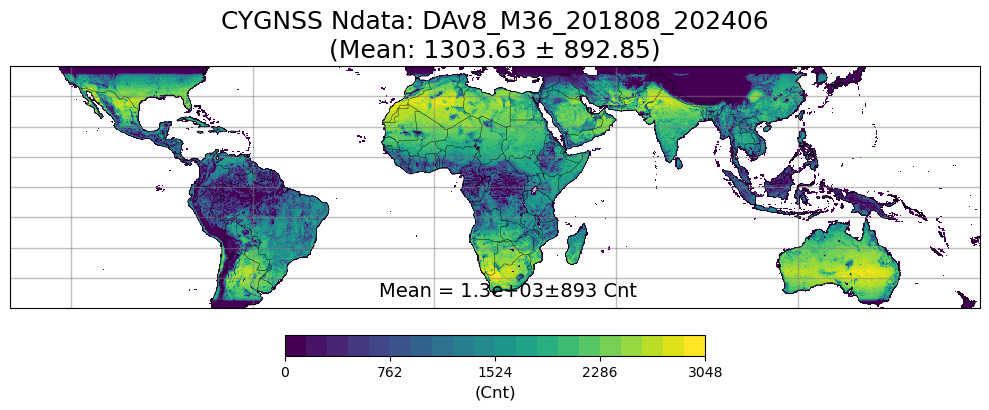

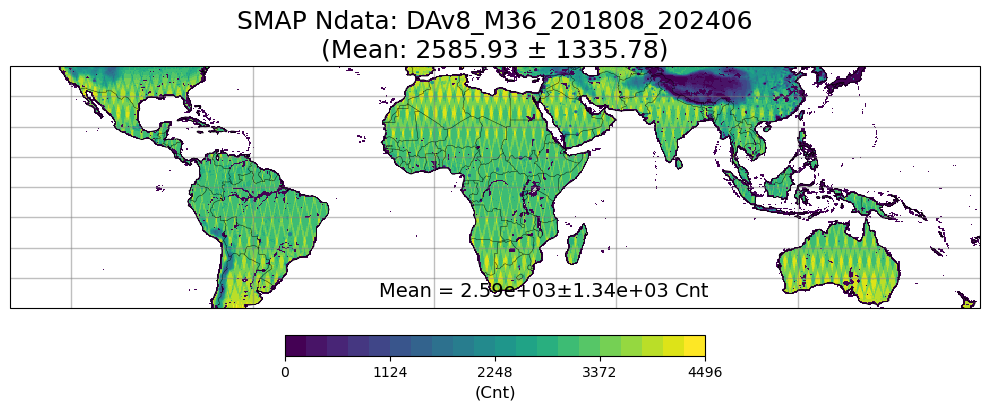

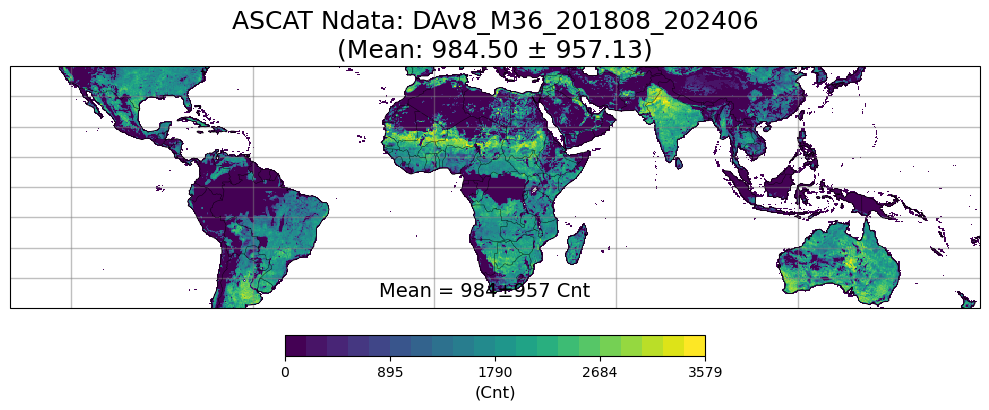

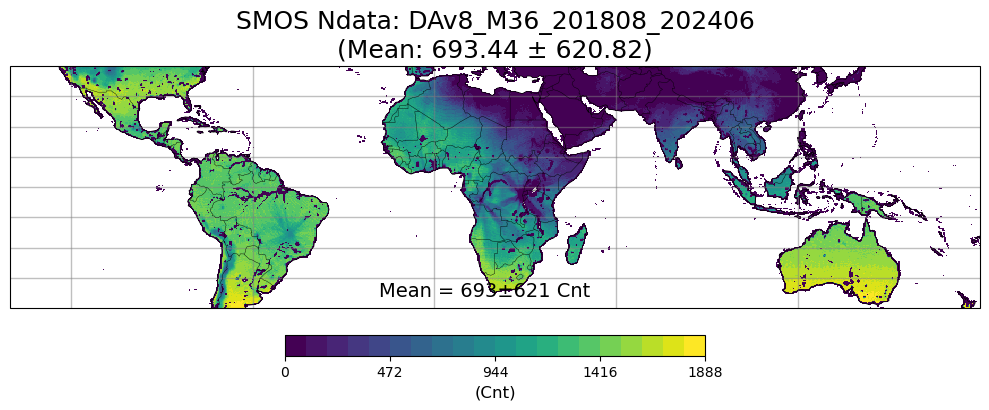

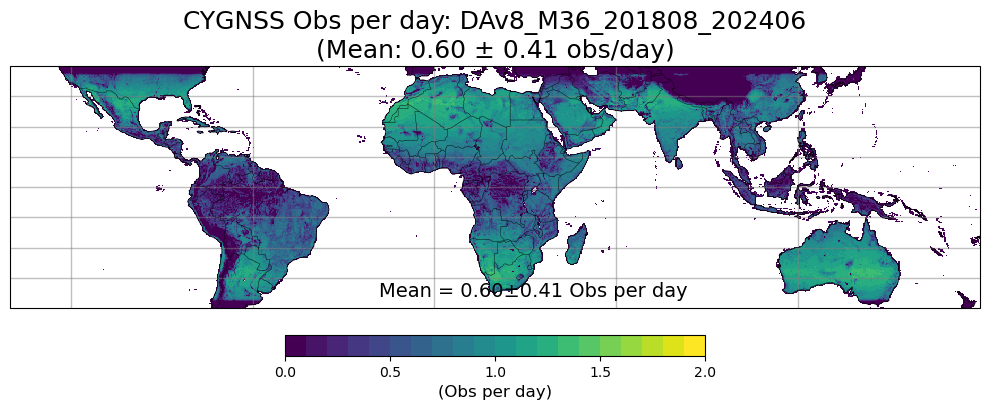

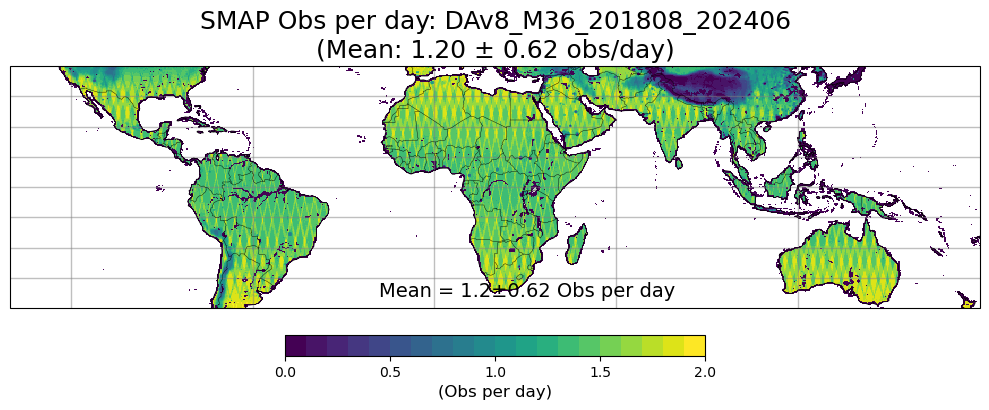

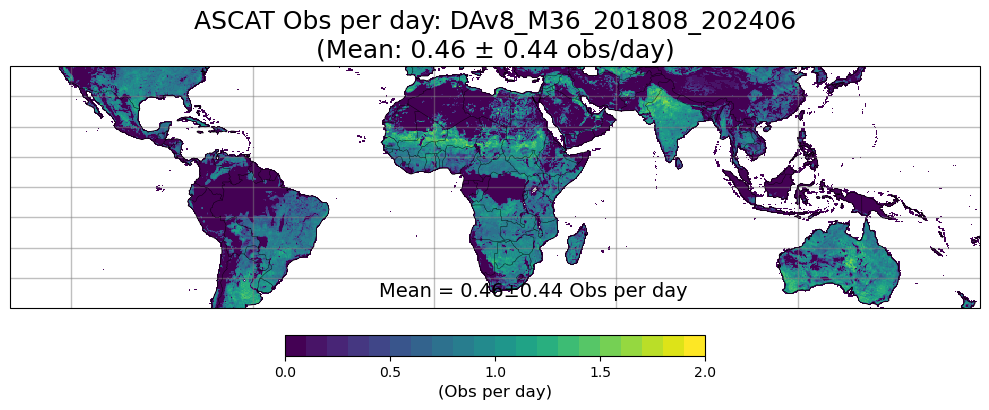

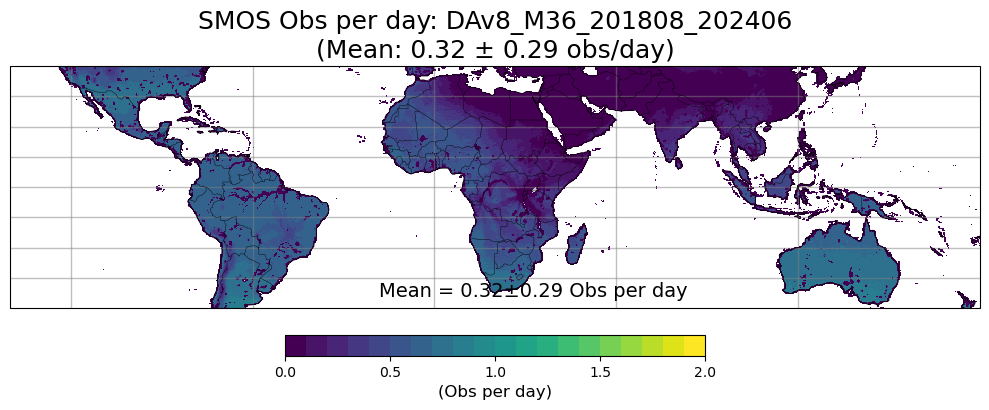

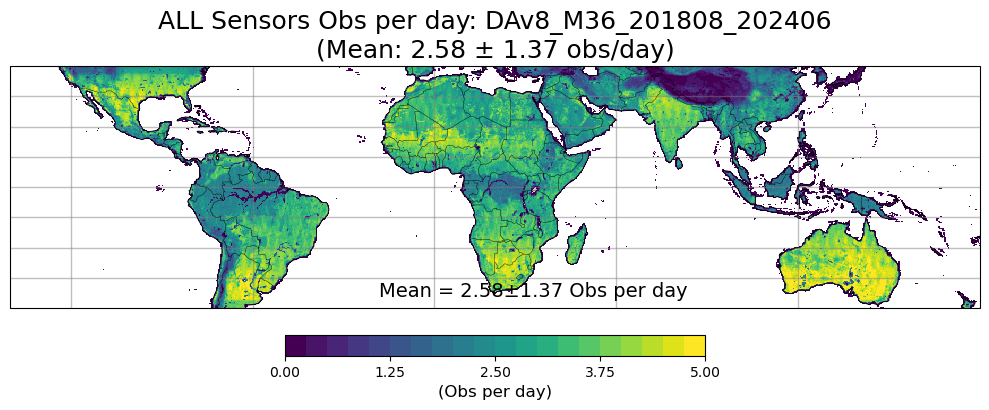

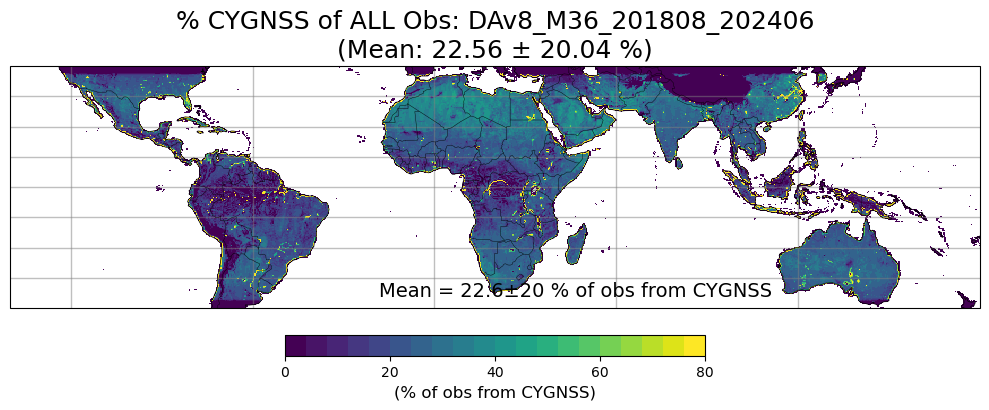

In [12]:
# Plot per-group raw counts and obs/day with mean±std in titles
for group in species_groups.keys():
    map_array[:, 0] = group_metrics_DA[group]['Nobs_data']
    meanval = np.nanmean(map_array[:, 0])
    stdval = np.nanstd(map_array[:, 0])
    fig, ax = plot_region(
        map_array,
        region_bounds=REGION_BOUNDS['cygnss'],
        meanflag=True,
        plot_title=f"{group} Ndata: DAv8_M36_201808_202406\n(Mean: {meanval:.2f} ± {stdval:.2f})",
        units='Cnt'
    )
    fig.tight_layout()

ndays = 2161

total_obs_per_day = np.zeros(map_array.shape[0], dtype=float)
cygnss_obs_per_day = np.zeros_like(total_obs_per_day)

for group in species_groups.keys():
    raw = group_metrics_DA[group]['Nobs_data']
    per_day = np.nan_to_num(raw / ndays, nan=0.0, posinf=0.0, neginf=0.0)

    map_array[:, 0] = per_day
    meanval = np.nanmean(map_array[:, 0])
    stdval = np.nanstd(map_array[:, 0])

    fig, ax = plot_region(
        map_array,
        region_bounds=REGION_BOUNDS['cygnss'],
        meanflag=True,
        plot_title=f"{group} Obs per day: DAv8_M36_201808_202406\n(Mean: {meanval:.2f} ± {stdval:.2f} obs/day)",
        units='Obs per day',
        cmin=0.0,
        cmax=2.0
    )
    fig.tight_layout()

    total_obs_per_day += per_day
    if group.upper() == 'CYGNSS':
        cygnss_obs_per_day = per_day

# ALL sensors
map_array[:, 0] = total_obs_per_day
meanval_all = np.nanmean(map_array[:, 0])
stdval_all = np.nanstd(map_array[:, 0])
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f"ALL Sensors Obs per day: DAv8_M36_201808_202406\n(Mean: {meanval_all:.2f} ± {stdval_all:.2f} obs/day)",
    units='Obs per day',
    cmin=0.0,
    cmax=5.0
)
fig.tight_layout()

frac_cygnss = np.divide(
    cygnss_obs_per_day, total_obs_per_day,
    out=np.zeros_like(total_obs_per_day), where=total_obs_per_day > 0
)
percent_cygnss = 100.0 * frac_cygnss
map_array[:, 0] = percent_cygnss
meanval_pct = np.nanmean(map_array[:, 0])
stdval_pct = np.nanstd(map_array[:, 0])
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f"% CYGNSS of ALL Obs: DAv8_M36_201808_202406\n(Mean: {meanval_pct:.2f} ± {stdval_pct:.2f} %)",
    units='% of obs from CYGNSS',
    cmin=0.0,
    cmax=80.0
)
fig.tight_layout()

In [13]:
def convert_stats_dict_to_arrays(stats_dict):
    """Convert dictionary of lists to numpy arrays"""
    array_dict = {}
    
    for key in stats_dict.keys():
        # Convert list to array and reshape
        array_dict[key] = np.array(stats_dict[key])
        
        # Check if we need to handle missing values (-- in data)
        if isinstance(array_dict[key][0], (list, np.ndarray)):
            # Replace '--' with np.nan
            temp_array = []
            for row in array_dict[key]:
                cleaned_row = [np.nan if x == '--' else float(x) for x in row]
                temp_array.append(cleaned_row)
            array_dict[key] = np.array(temp_array)
    
    return array_dict

# Convert dictionary
stats_dict_DA_arrays = convert_stats_dict_to_arrays(stats_dict_DA)
stats_dict_OL_arrays = convert_stats_dict_to_arrays(stats_dict_OL)
stats_dict_DA_all_arrays = convert_stats_dict_to_arrays(stats_dict_DA_all)
stats_DA_ssa_arrays = convert_stats_dict_to_arrays(stats_dict_DA_ssa)

# Convert date vector to datetime objects
date_vec_DA = [datetime.strptime(date, '%Y%m') for date in date_vec_DA]
date_vec_OL = [datetime.strptime(date, '%Y%m') for date in date_vec_OL]
date_vec_DA_all = [datetime.strptime(date, '%Y%m') for date in date_vec_DA_all]
date_vec_DA_ssa = [datetime.strptime(date, '%Y%m') for date in date_vec_DA_ssa]

# Print first few dates to verify
print("Sample dates:", date_vec_DA[:3])
# Print the last few dates to verify
print("Sample dates:", date_vec_DA[-3:])

Sample dates: [datetime.datetime(2018, 8, 1, 0, 0), datetime.datetime(2018, 9, 1, 0, 0), datetime.datetime(2018, 10, 1, 0, 0)]
Sample dates: [datetime.datetime(2024, 4, 1, 0, 0), datetime.datetime(2024, 5, 1, 0, 0), datetime.datetime(2024, 6, 1, 0, 0)]


In [14]:
def calculate_weighted_group_stats(stats_dict, species_groups):
    """Calculate weighted statistics for each group"""
    
    n_times = len(stats_dict['OmF_mean'])
    stats = ['O_mean','F_mean','OmF_mean', 'OmF_stdv', 'OmA_mean', 'OmA_stdv']
    
    # Initialize output dictionary
    group_stats = {}
    for group in species_groups.keys():
        group_stats[group] = {stat: np.zeros(n_times) for stat in stats}
        group_stats[group]['N_data'] = np.zeros(n_times)
    
    # Calculate weighted stats for each timestep
    for t in range(n_times):
        for group, indices in species_groups.items():
            # Get weights for this group/time
            weights = stats_dict['N_data'][t, indices]
            total_weight = np.sum(weights)
            
            if total_weight > 0:
                # Calculate weighted statistics
                for stat in stats:
                    values = stats_dict[stat][t, indices]
                    group_stats[group][stat][t] = np.average(values, weights=weights)
                group_stats[group]['N_data'][t] = total_weight
            else:
                # Set to NaN if no observations
                for stat in stats:
                    group_stats[group][stat][t] = np.nan
                    
    return group_stats

# Calculate group means
group_ts_DA = calculate_weighted_group_stats(stats_dict_DA_arrays, species_groups)
group_ts_OL = calculate_weighted_group_stats(stats_dict_OL_arrays, species_groups)
group_ts_DA_all = calculate_weighted_group_stats(stats_dict_DA_all_arrays, species_groups)
group_ts_DA_ssa = calculate_weighted_group_stats(stats_DA_ssa_arrays, species_groups)

In [15]:
print("length of date_vec_DA", len(date_vec_DA))
print("length of date_vec", len(date_vec))
print("length of date_vec_DA_all", len(date_vec_DA_all))
print("length of date_vec_DA_ssa", len(date_vec_DA_ssa))

length of date_vec_DA 71
length of date_vec 71
length of date_vec_DA_all 71
length of date_vec_DA_ssa 71


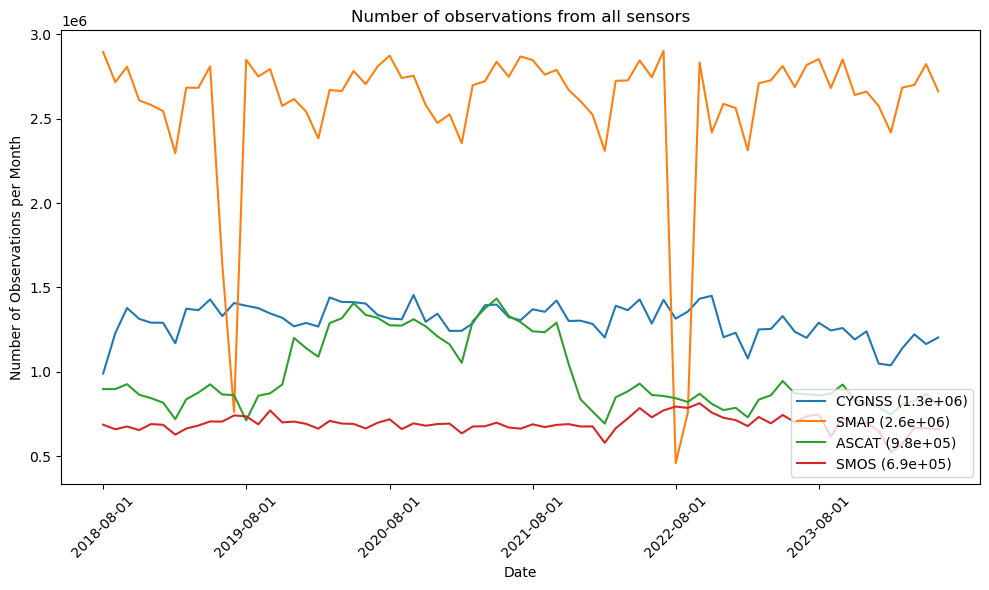

In [16]:
# Replace zeros with NaNs in the data
for group in species_groups.keys():
    group_ts_DA[group]['N_data'] = np.where(group_ts_DA[group]['N_data'] == 0, np.nan, group_ts_DA[group]['N_data'])

# Plot time series of the number of observations for each group
plt.figure(figsize=(10, 6))

# Plot Nobs_data for DA for all groups on one figure
for group in species_groups.keys():
    mean_val = np.nanmean(group_ts_DA[group]['N_data'])
    plt.plot(date_vec_DA, group_ts_DA[group]['N_data'], label=f'{group} ({mean_val:.1e})')

# Customize plot
plt.title('Number of observations from all sensors')
plt.xlabel('Date')
plt.ylabel('Number of Observations per Month')
plt.legend(loc='lower right')

# Set x-ticks using datetime array
plt.xticks(date_vec_DA[::12], rotation=45)

plt.tight_layout()
plt.show()

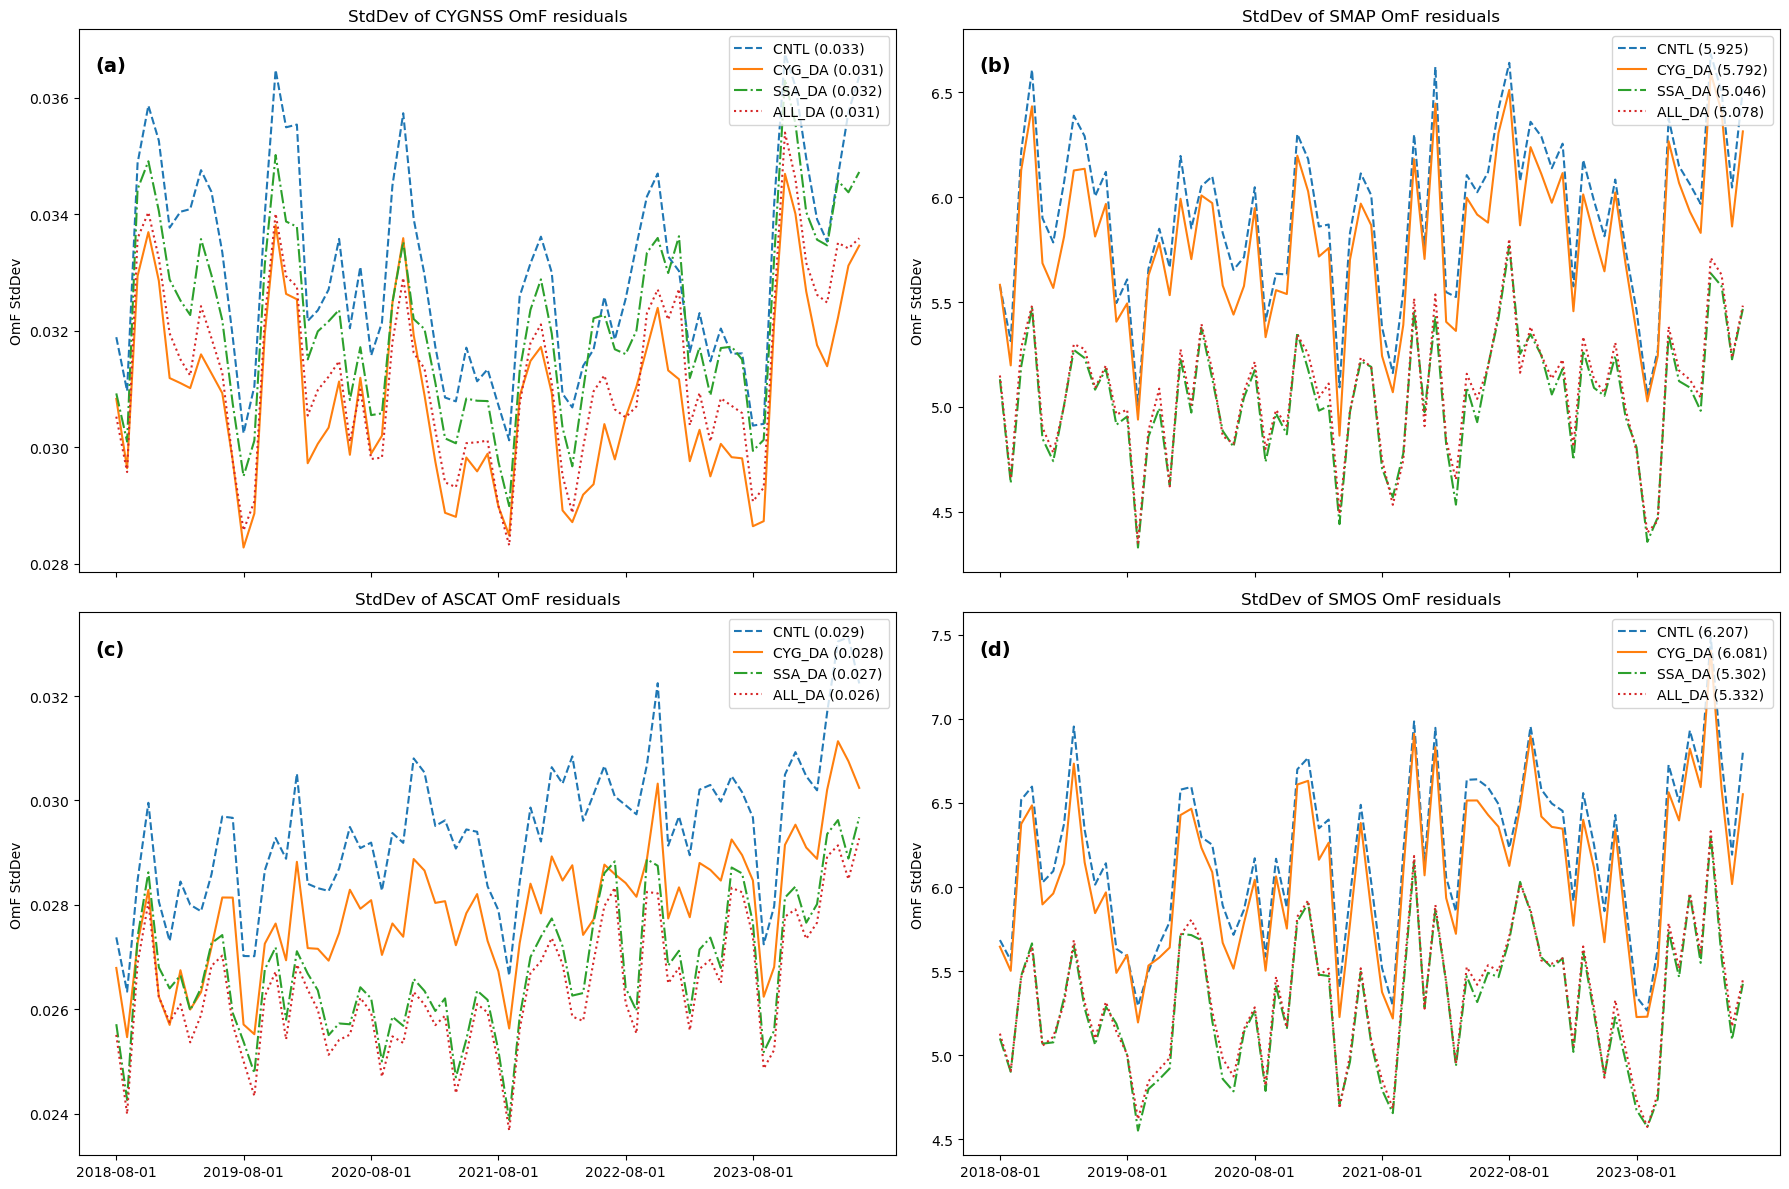

In [32]:
# 2x2 panel: OM-F stddev time series per species
# Panel order: CYGNSS (a), SMAP (b), ASCAT (c), SMOS (d)
panel_order = ["CYGNSS", "SMAP", "ASCAT", "SMOS"]
panel_labels = ["(a)", "(b)", "(c)", "(d)"]
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True)
axes = axes.flatten()

for ax, species, lab in zip(axes, panel_order, panel_labels):
    mean_OL = np.nanmean(group_ts_OL[species]['OmF_stdv'])
    mean_DA = np.nanmean(group_ts_DA[species]['OmF_stdv'])
    mean_DA_all = np.nanmean(group_ts_DA_all[species]['OmF_stdv'])
    mean_DA_ssa = np.nanmean(group_ts_DA_ssa[species]['OmF_stdv'])

    ax.plot(date_vec_DA, group_ts_OL[species]['OmF_stdv'], '--', label=f'CNTL ({mean_OL:.3f})')
    ax.plot(date_vec_DA, group_ts_DA[species]['OmF_stdv'], '-', label=f'CYG_DA ({mean_DA:.3f})')
    ax.plot(date_vec_DA_ssa, group_ts_DA_ssa[species]['OmF_stdv'], '-.', label=f'SSA_DA ({mean_DA_ssa:.3f})')
    ax.plot(date_vec_DA_all, group_ts_DA_all[species]['OmF_stdv'], ':', label=f'ALL_DA ({mean_DA_all:.3f})')

    ax.set_title(f'StdDev of {species} OmF residuals')
    ax.set_ylabel('OmF StdDev')
    ax.text(0.02, 0.95, lab, transform=ax.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    ax.legend(loc='upper right', fontsize=10)

# Only bottom panels get x labels/ticks
for i, ax in enumerate(axes):
    if i in [2, 3]:
        # ax.set_xlabel('Date')
        ax.set_xticks(date_vec_DA[::12])
        ax.tick_params(axis='x')
    else:
        ax.tick_params(axis='x', labelbottom=False)

plt.tight_layout()
plt.show()


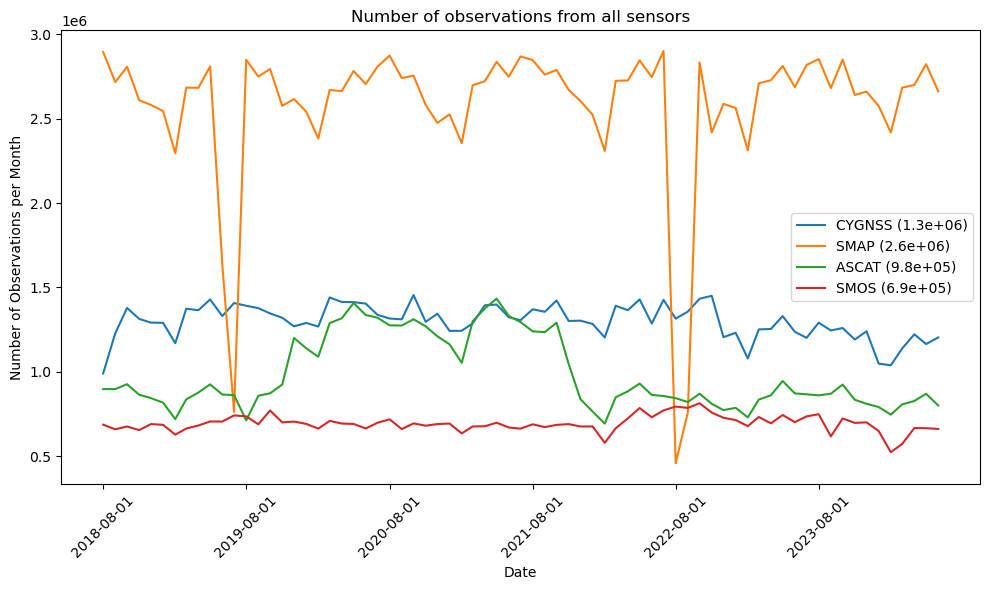

In [18]:
# Replace zeros with NaNs in the data
for group in species_groups.keys():
    group_ts_DA[group]['N_data'] = np.where(group_ts_DA[group]['N_data'] == 0, np.nan, group_ts_DA[group]['N_data'])

# Plot time series of the number of observations for each group
plt.figure(figsize=(10, 6))

# Plot Nobs_data for DA for all groups on one figure
for group in species_groups.keys():
    mean_val = np.nanmean(group_ts_DA[group]['N_data'])
    plt.plot(date_vec_DA, group_ts_DA[group]['N_data'], label=f'{group} ({mean_val:.1e})')

# Customize plot
plt.title('Number of observations from all sensors')
plt.xlabel('Date')
plt.ylabel('Number of Observations per Month')
plt.legend()

# Set x-ticks using datetime array
plt.xticks(date_vec_DA[::12], rotation=45)

plt.tight_layout()
plt.show()

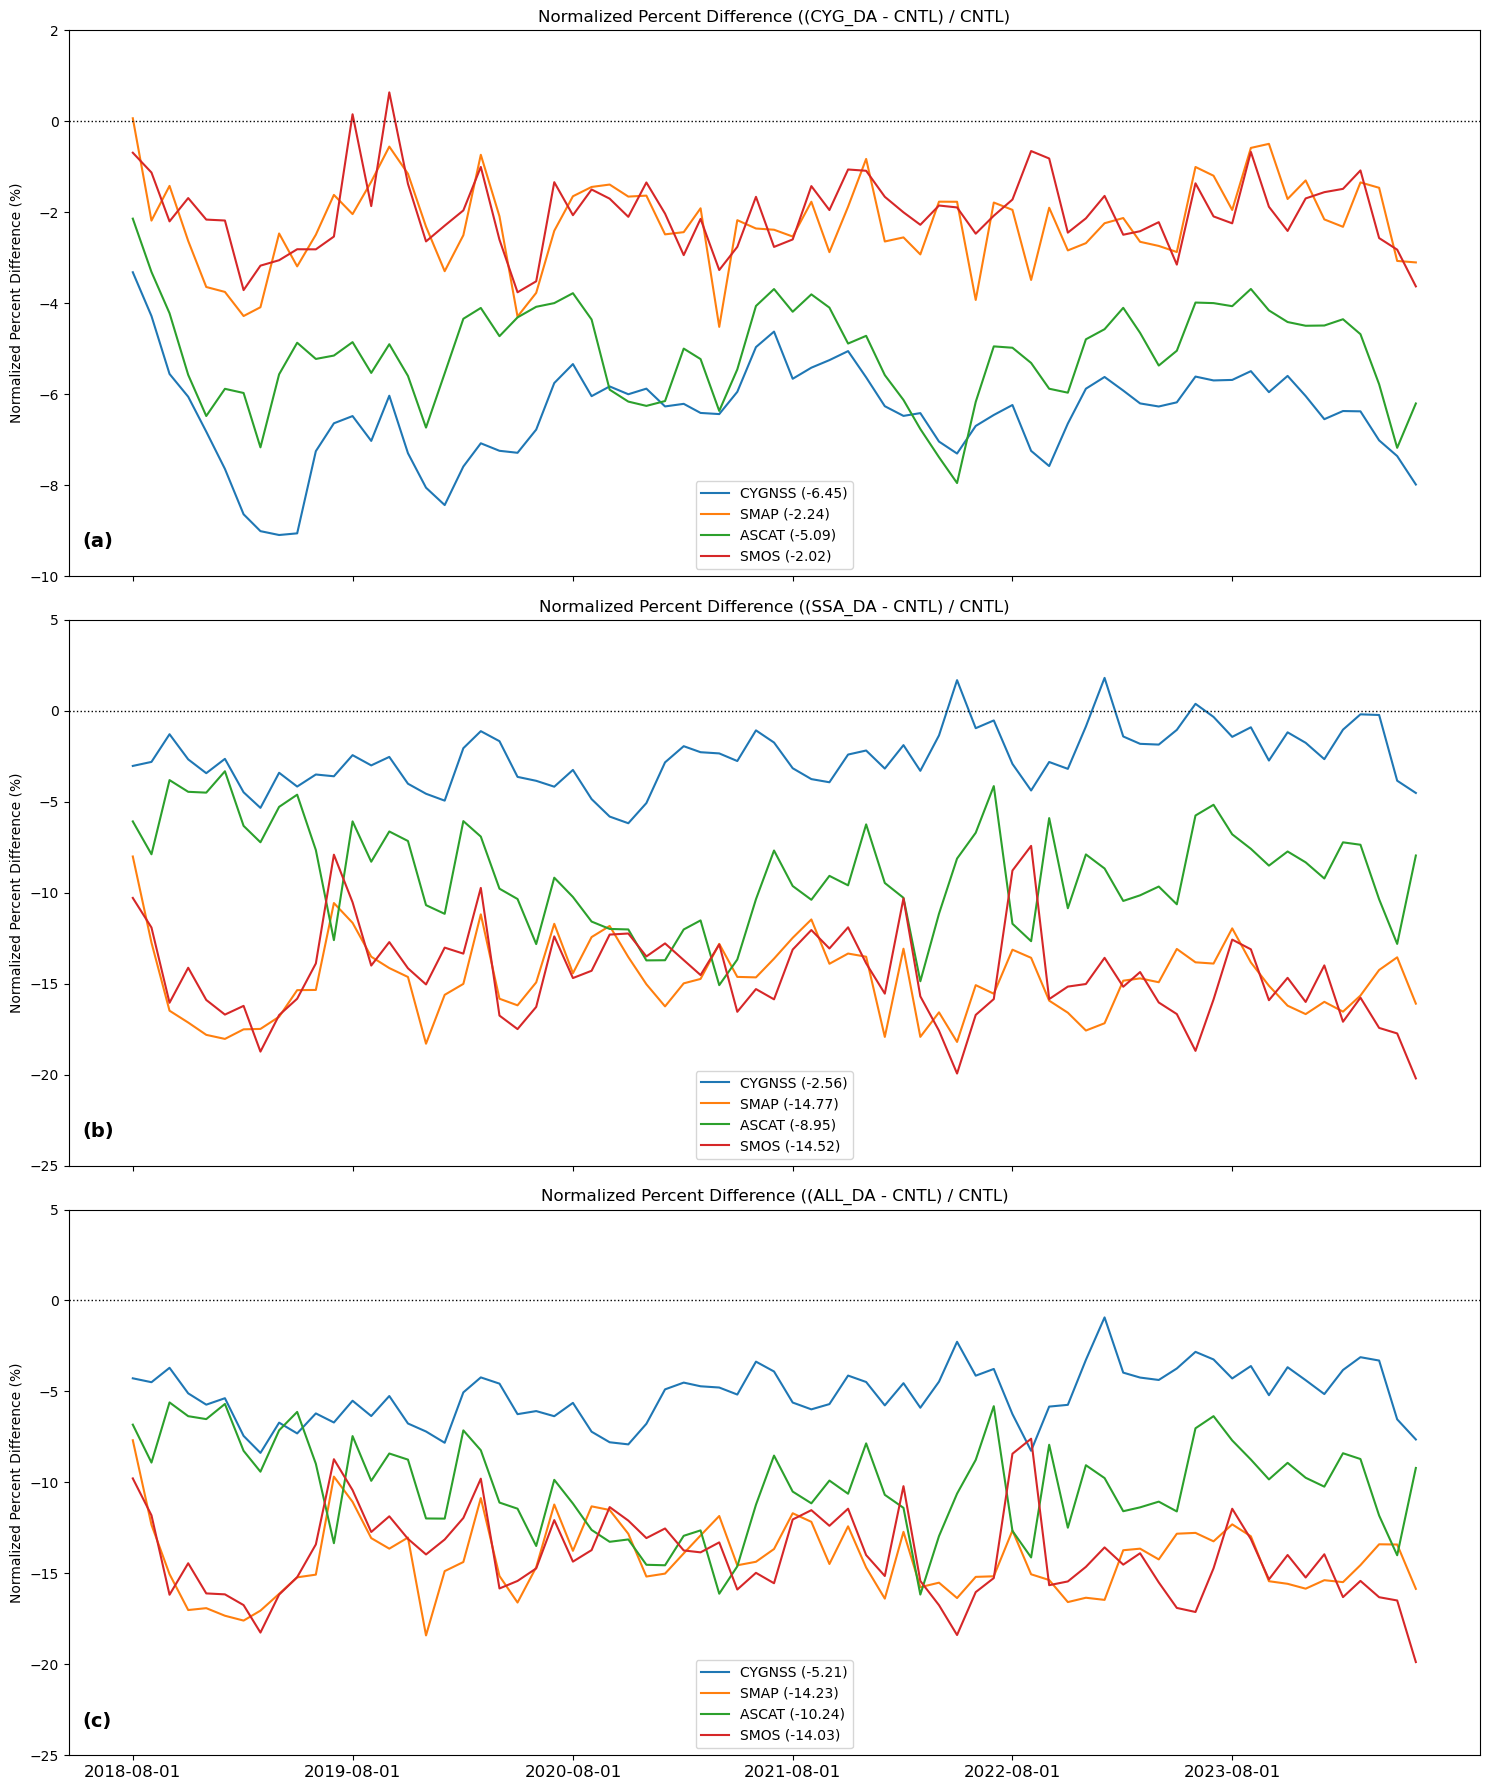

In [33]:
# Combined normalized percent difference for CYG_DA, SSA_DA, ALL_DA
fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharex=True)
labels = ["(a)", "(b)", "(c)"]
panels = [
    (group_ts_DA, date_vec_DA, "Normalized Percent Difference ((CYG_DA - CNTL) / CNTL)", (-10, 2)),
    (group_ts_DA_ssa, date_vec_DA_ssa, "Normalized Percent Difference ((SSA_DA - CNTL) / CNTL)", (-25, 5)),
    (group_ts_DA_all, date_vec_DA, "Normalized Percent Difference ((ALL_DA - CNTL) / CNTL)", (-25, 5)),
]
groups_to_plot = list(species_groups.keys())[:4]

for i, (ax, (ts_dict, dates, title, ylim), lab) in enumerate(zip(axes, panels, labels)):
    for group in groups_to_plot:
        norm_percent_diff = np.divide(
            (ts_dict[group]['OmF_stdv'] - group_ts_OL[group]['OmF_stdv']),
            group_ts_OL[group]['OmF_stdv'],
            out=np.full_like(group_ts_OL[group]['OmF_stdv'], np.nan, dtype=float),
            where=group_ts_OL[group]['OmF_stdv'] != 0
        ) * 100
        mean_diff = np.nanmean(norm_percent_diff)
        ax.plot(dates, norm_percent_diff, label=f'{group} ({mean_diff:.2f})')
    
    ax.set_title(title)
    ax.set_ylabel('Normalized Percent Difference (%)')
    ax.axhline(y=0, color='black', linestyle=':', linewidth=1)
    ax.set_ylim(*ylim)
    ax.text(0.01, 0.08, lab, transform=ax.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    ax.legend()  # Add legend to each subplot
    
    # Only show x-axis labels and ticks on the bottom plot
    if i < 2:  # Top two plots
        ax.tick_params(axis='x', labelbottom=False)
    else:  # Bottom plot
        # ax.set_xlabel('Date')
        ax.set_xticks(dates[::12])
        ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in dates[::12]], fontsize=12)
        ax.tick_params(axis='x')

plt.tight_layout()
plt.show()


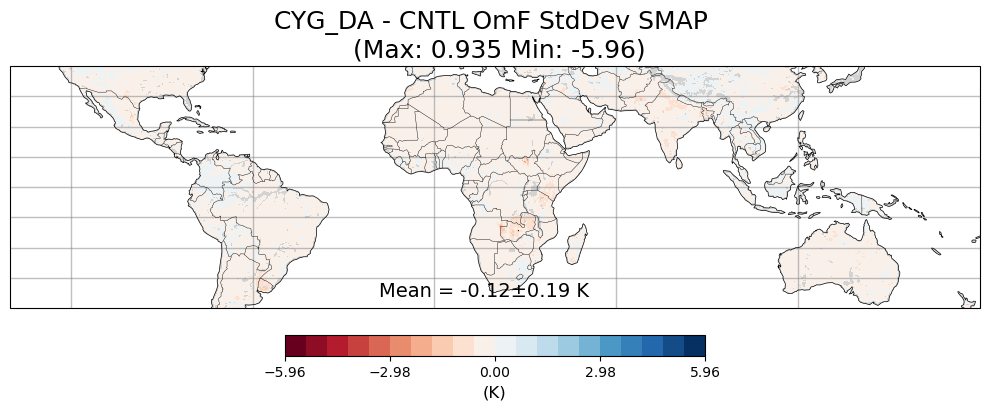

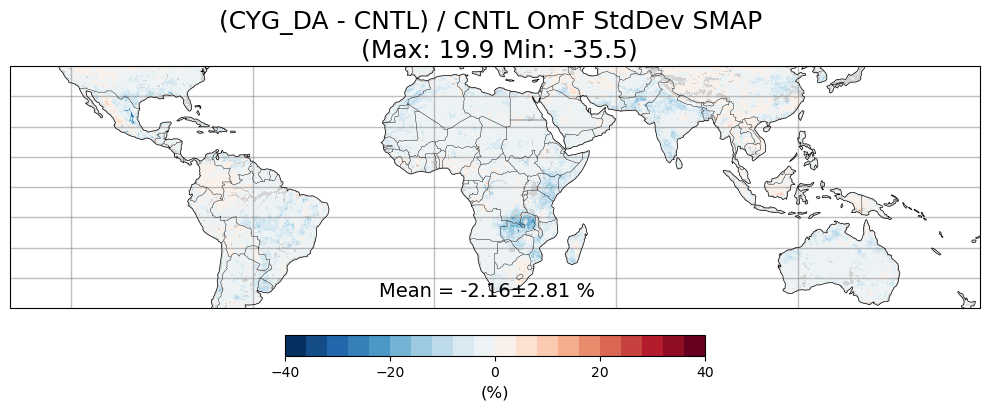

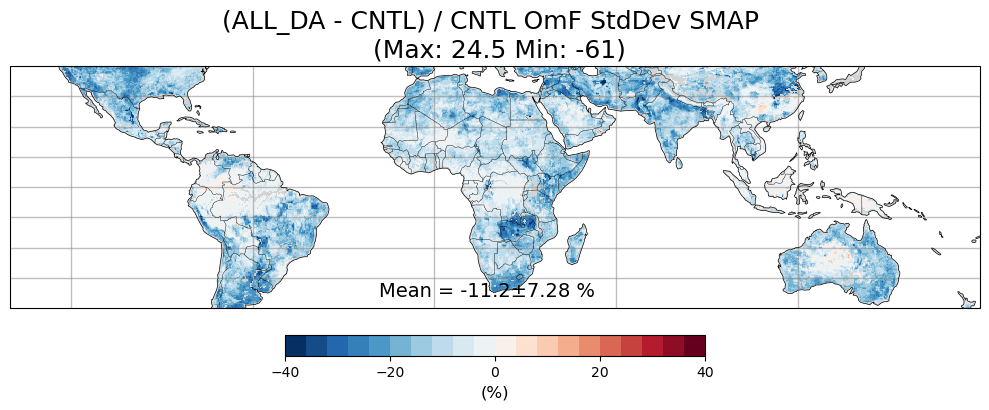

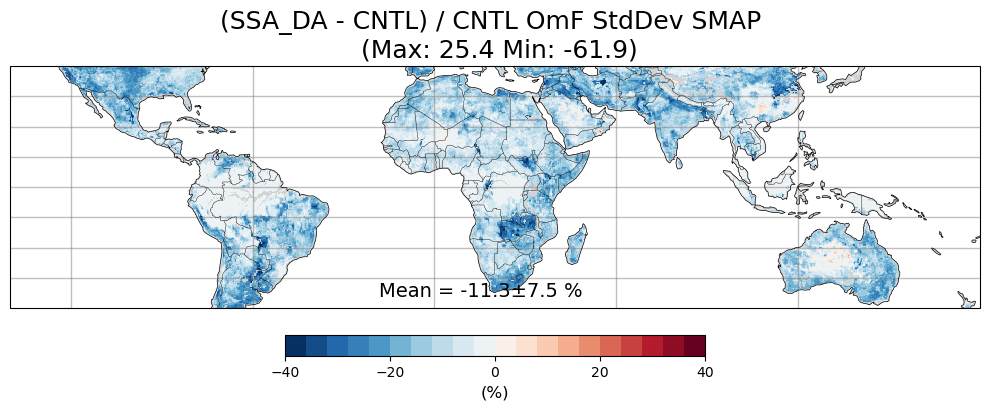

In [20]:
group_name = 'SMAP'

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'CYG_DA - CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    units='K'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(CYG_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA_all[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(ALL_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA_ssa[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(SSA_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()


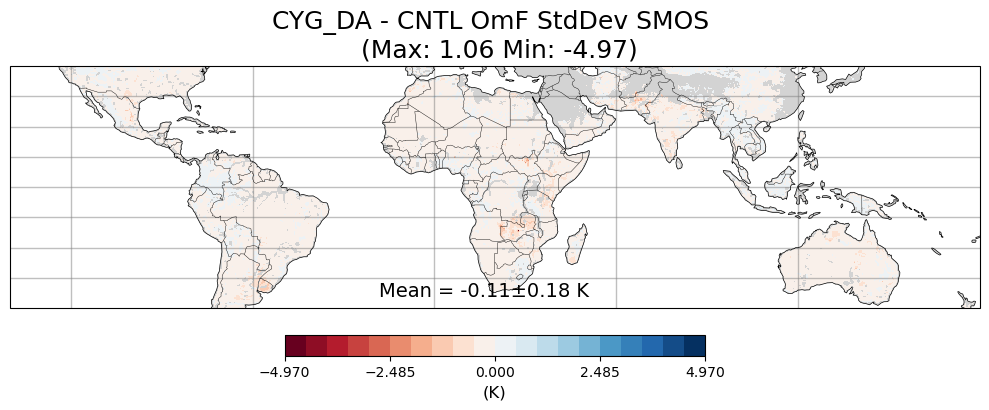

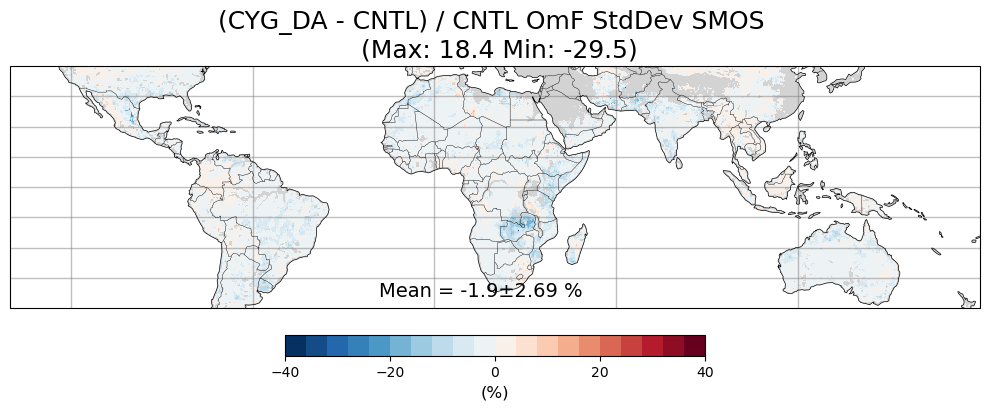

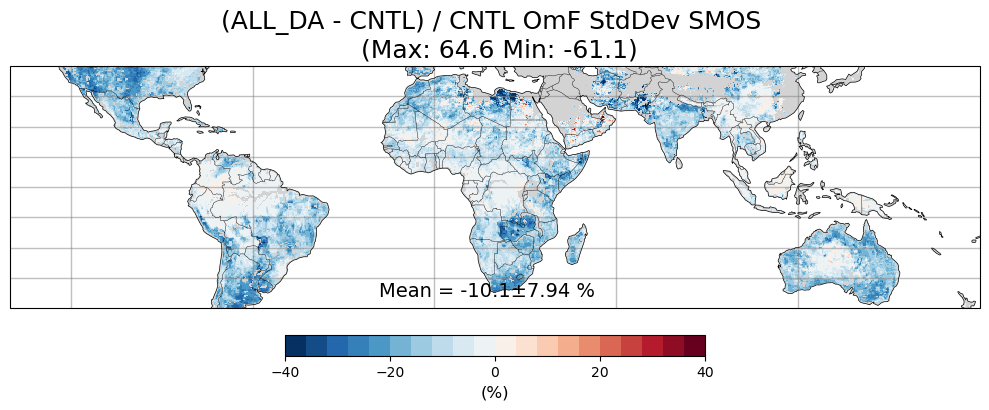

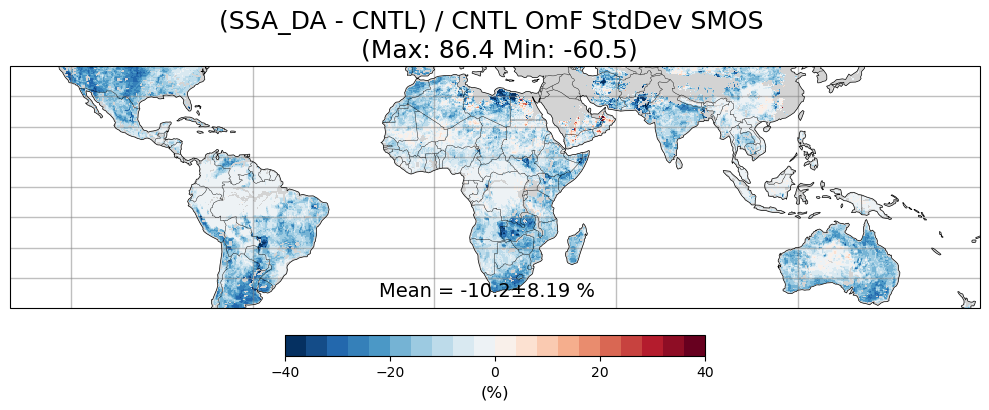

In [21]:
group_name = 'SMOS'

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'CYG_DA - CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    units='K'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(CYG_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA_all[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(ALL_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA_ssa[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(SSA_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

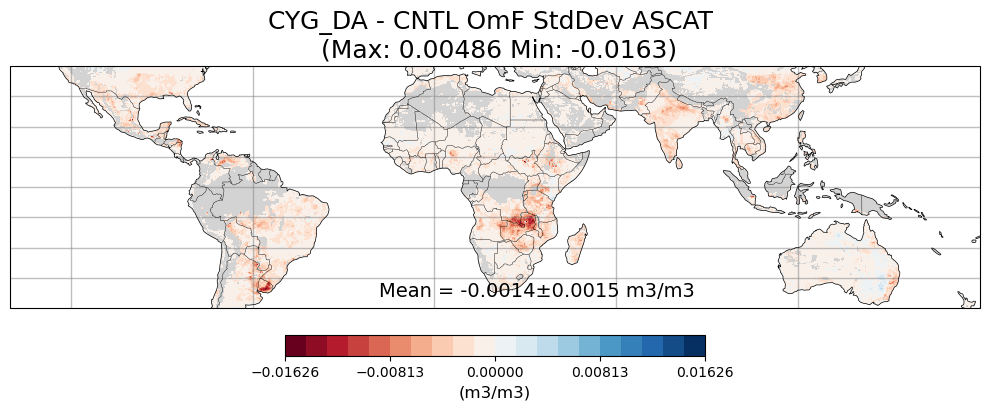

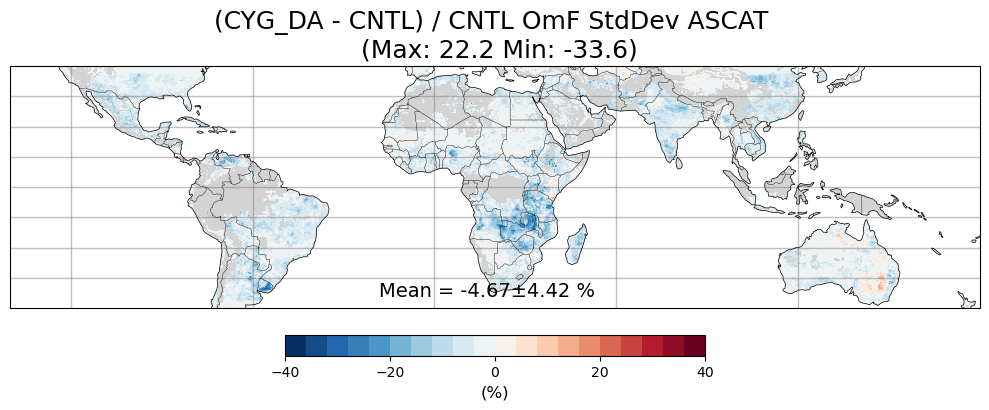

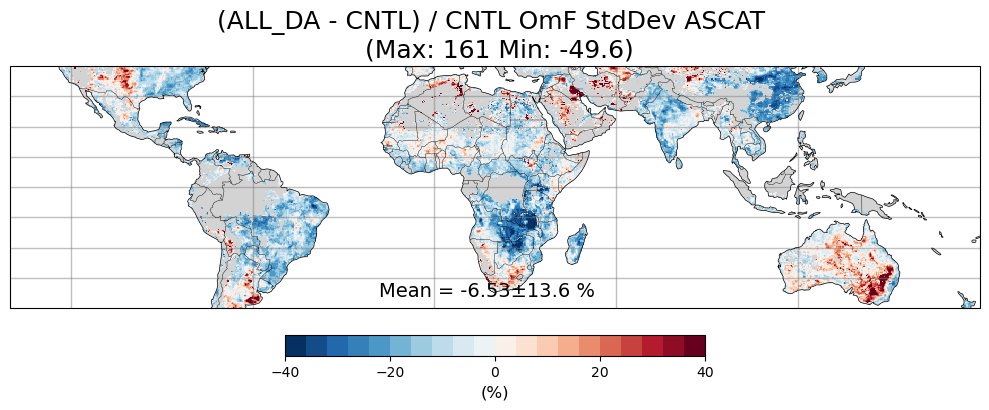

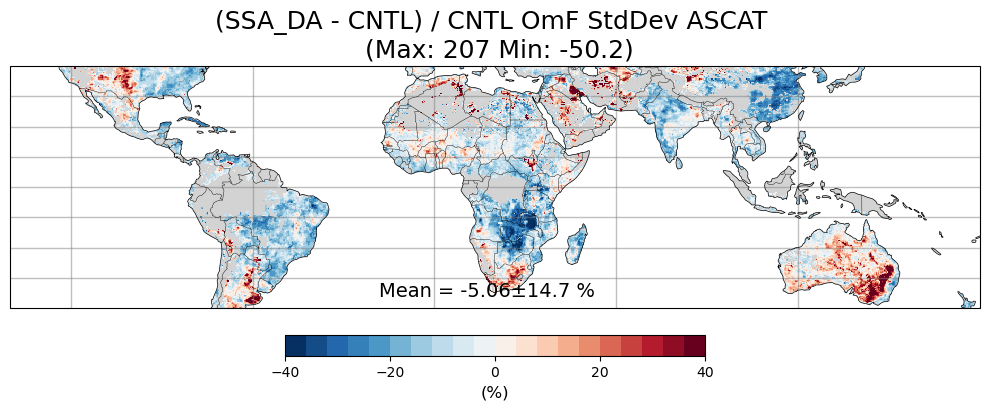

In [22]:
group_name = 'ASCAT'

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'CYG_DA - CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    units='m3/m3'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(CYG_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA_all[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(ALL_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA_ssa[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(SSA_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

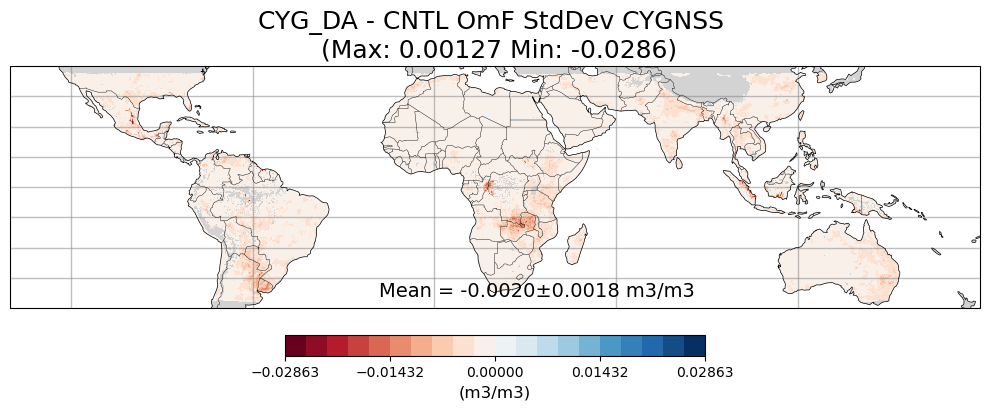

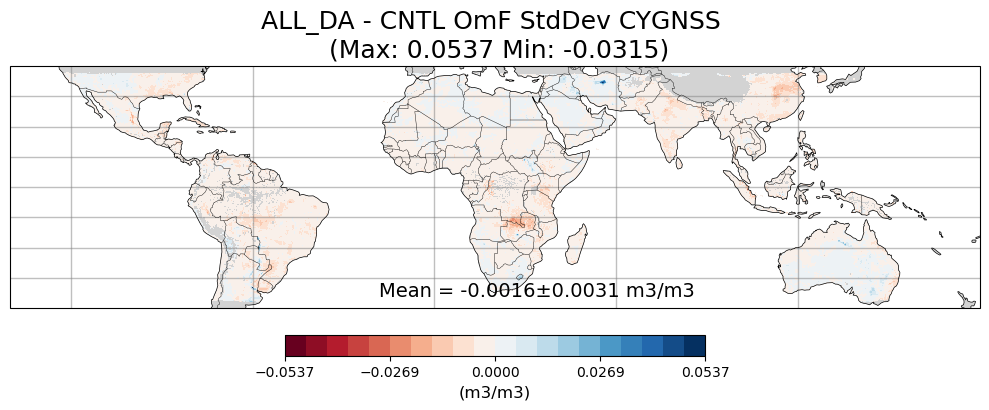

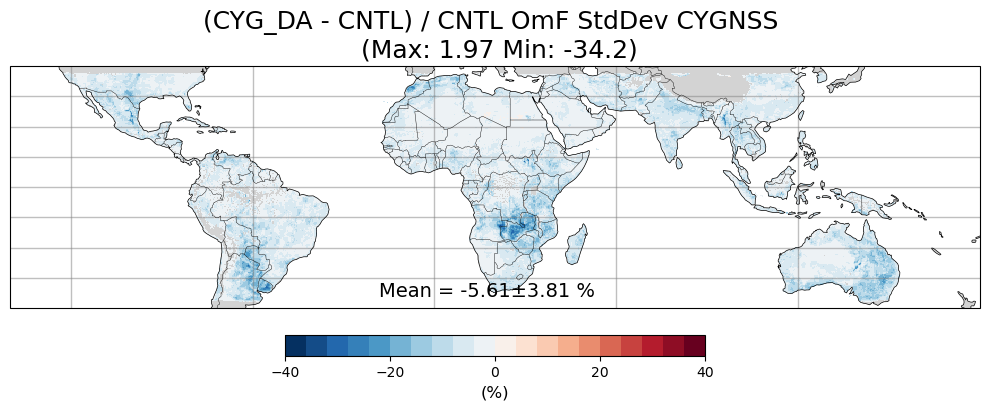

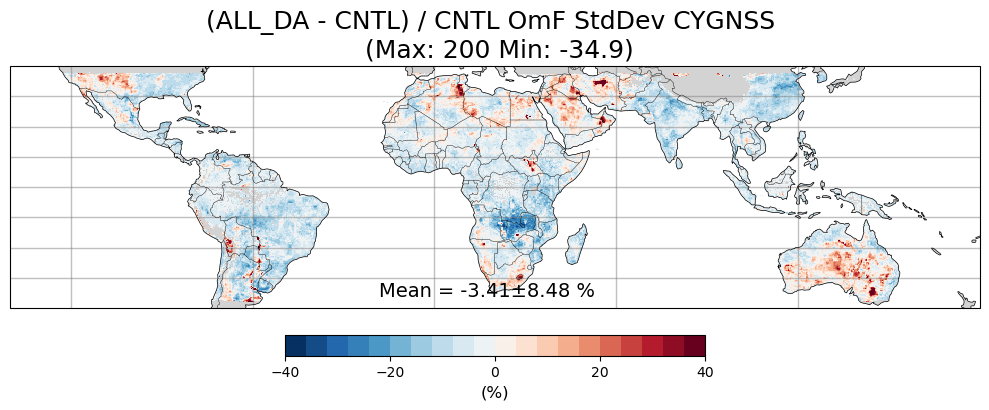

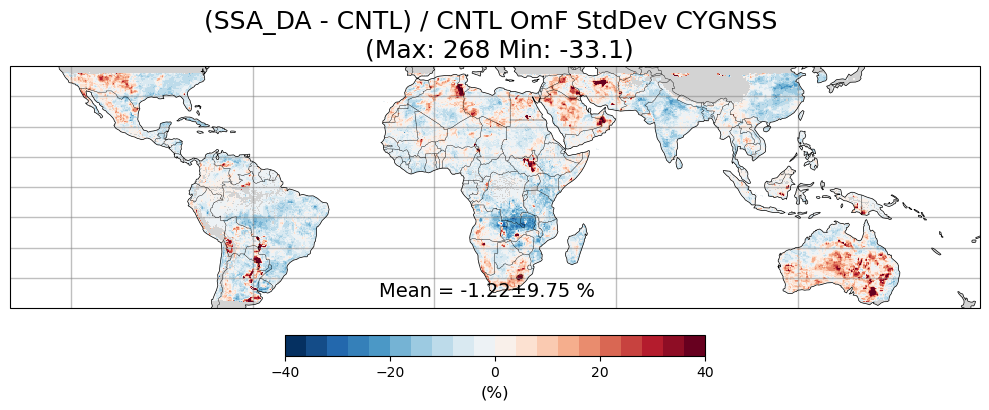

In [23]:
group_name = 'CYGNSS'

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'CYG_DA - CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    units='m3/m3'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA_all[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'ALL_DA - CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    units='m3/m3'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(CYG_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA_all[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(ALL_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA_ssa[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'(SSA_DA - CNTL) / CNTL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})',
    cmin=-40,
    cmax=40,
    units='%'
)
fig.tight_layout()

/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/1347706092.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis', len(edges)-1)
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/1347706092.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis', len(edges)-1)
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/1347706092.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

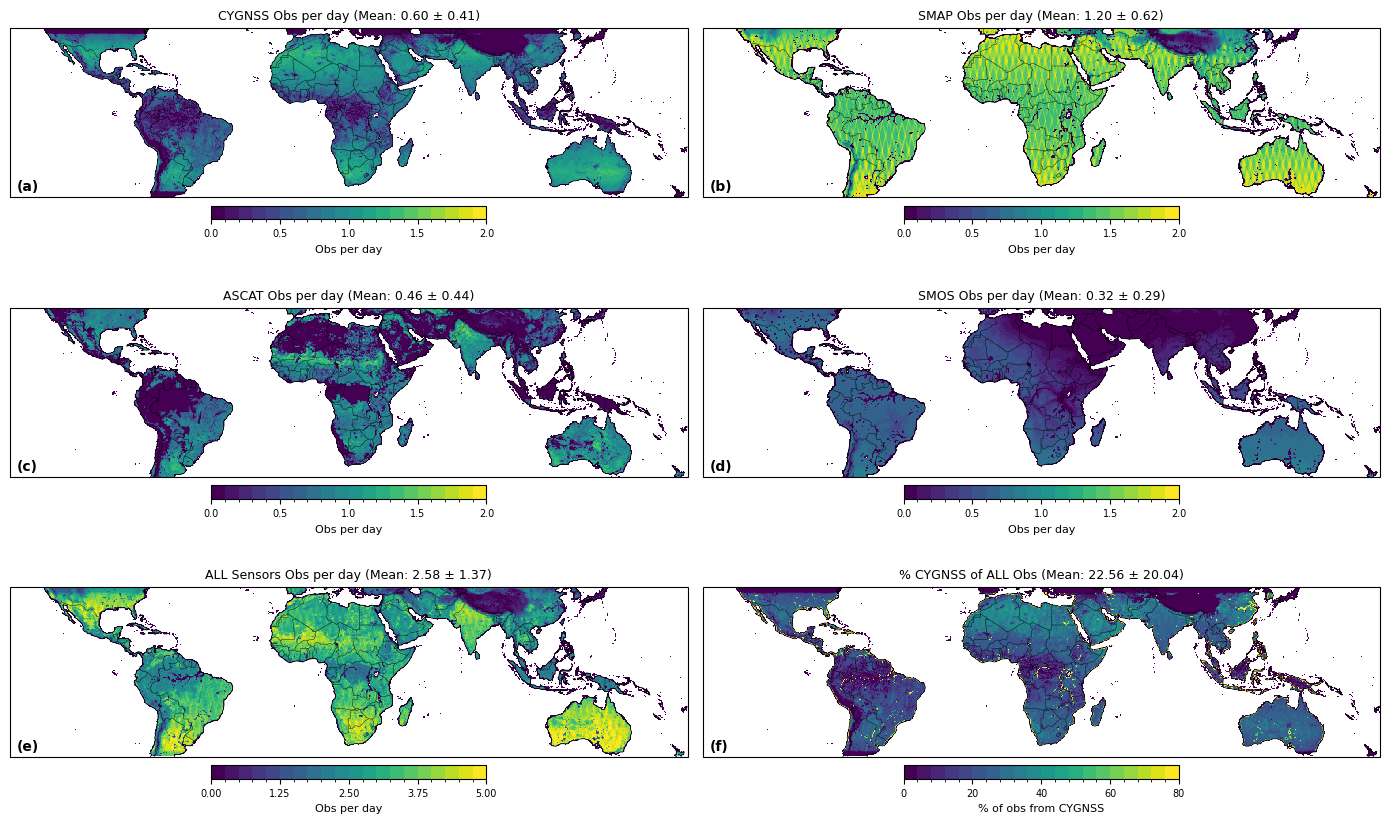

In [24]:
# 6-panel map: CYGNSS, SMAP, ASCAT, SMOS, ALL, %CYGNSS (Obs/day)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from common.python.plotting.geospatial_plotting import load_ease_grid, build_ease_grid_mapping
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap

ndays = 2161
# Initialize map_array with proper shape (n_tile, 3) where columns are: data, lon, lat
map_array = np.empty([n_tile, 3])
map_array.fill(np.nan)
map_array[:, 1] = lon
map_array[:, 2] = lat

def compute_per_day(group_metrics, group_name):
    raw = group_metrics[group_name]['Nobs_data']
    return np.nan_to_num(raw / ndays, nan=0.0, posinf=0.0, neginf=0.0)

# Per-day counts per group
per_day_maps = {g: compute_per_day(group_metrics_DA, g) for g in species_groups.keys()}
# Totals and cygnss fraction
total_obs_per_day = sum(per_day_maps.values())
cygnss_obs_per_day = per_day_maps.get('CYGNSS', np.zeros_like(total_obs_per_day))
frac_cygnss = np.divide(cygnss_obs_per_day, total_obs_per_day, out=np.zeros_like(total_obs_per_day), where=total_obs_per_day>0)
percent_cygnss = 100.0 * frac_cygnss

# Helper to plot on given ax
lats, lons = load_ease_grid()
lats_row, lons_col = lats[:,1], lons[1,:]
lon_grid, lat_grid = np.meshgrid(lons_col, lats_row)

panel_defs = [
    ('CYGNSS', per_day_maps['CYGNSS'], 'CYGNSS Obs per day', (0, 2.0), '(a)'),
    ('SMAP',   per_day_maps['SMAP'],   'SMAP Obs per day',   (0, 2.0), '(b)'),
    ('ASCAT',  per_day_maps['ASCAT'],  'ASCAT Obs per day',  (0, 2.0), '(c)'),
    ('SMOS',   per_day_maps['SMOS'],   'SMOS Obs per day',   (0, 2.0), '(d)'),
    ('ALL',    total_obs_per_day,      'ALL Sensors Obs per day', (0, 5.0), '(e)'),
    ('%CYGNSS',percent_cygnss,         '% CYGNSS of ALL Obs', (0, 80.0), '(f)'),
]

fig, axes = plt.subplots(3, 2, figsize=(14, 9), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
for ax, (name, data_1d, title, clim, lab) in zip(axes, panel_defs):
    map_array[:,0] = data_1d
    grid = build_ease_grid_mapping(map_array, lats_row, lons_col)
    
    # Create custom colormap with 20 discrete colors
    edges = np.linspace(clim[0], clim[1], 21)  # 21 edges for 20 intervals
    cmap = get_cmap('viridis', len(edges)-1)
    norm = BoundaryNorm(edges, cmap.N)
    
    sc = ax.pcolormesh(lon_grid, lat_grid, grid, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.set_extent(REGION_BOUNDS['cygnss'], crs=ccrs.PlateCarree())
    
    maxval = np.nanmax(data_1d)
    minval = np.nanmin(data_1d)
    meanval = np.nanmean(data_1d)
    stdval = np.nanstd(data_1d)
    ax.set_title(f"{title} (Mean: {meanval:.2f} ± {stdval:.2f})", fontsize=9)
    ax.text(0.01, 0.02, lab, transform=ax.transAxes, fontsize=10, fontweight='bold', va='bottom', ha='left')
    
    cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.03, fraction=0.05)
    units = 'Obs per day' if name != '%CYGNSS' else '% of obs from CYGNSS'
    cbar.set_label(units, fontsize=8)
    
    # Set 5 tick labels evenly spaced across the range
    tick_positions = np.linspace(clim[0], clim[1], 5)
    cbar.set_ticks(tick_positions)
    cbar.ax.tick_params(labelsize=7)
plt.tight_layout()
plt.show()


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/977956610.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("RdBu_r", len(edges)-1)
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/977956610.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(0, 0.08, 1, 1))


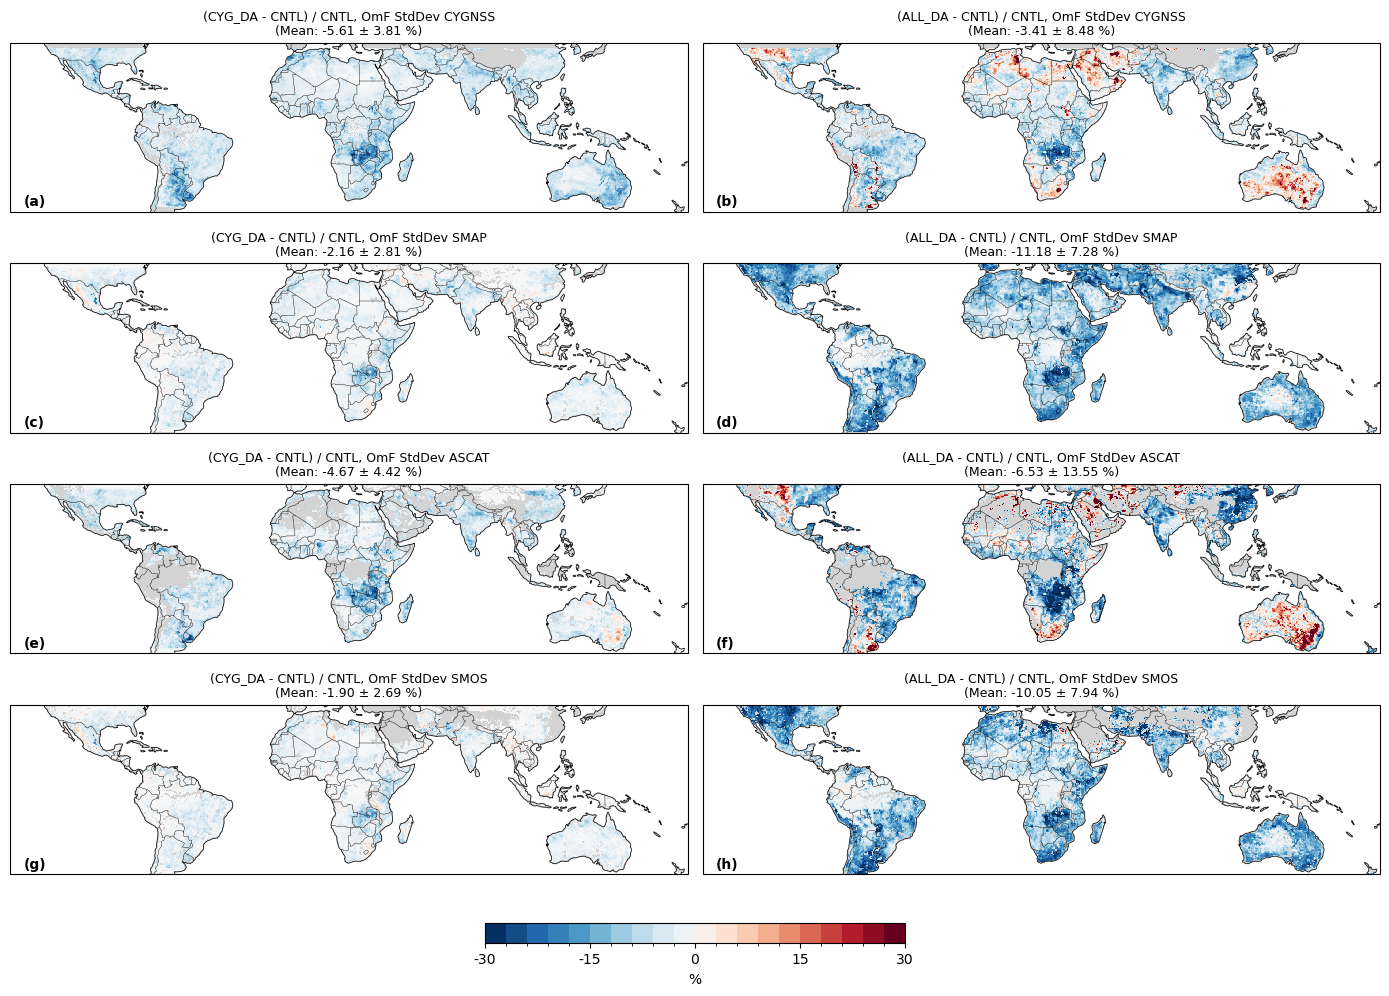

In [25]:
# 8-panel percent-difference maps (DA - CNTL) / CNTL for OmF StdDev
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from common.python.plotting.geospatial_plotting import load_ease_grid, build_ease_grid_mapping

# Helper to compute percent diff safely
def pct_diff(da, ol):
    return np.divide(da - ol, ol, out=np.full_like(ol, np.nan, dtype=float), where=ol != 0) * 100.0

# Prepare per-group percent differences
map_array = np.empty([n_tile, 3])
map_array.fill(np.nan)
map_array[:, 1] = lon
map_array[:, 2] = lat
map_array = map_array.copy()

pct_maps = {
    ('CYGNSS', 'CYG_DA'): pct_diff(group_metrics_DA['CYGNSS']['OmF_stdv'], group_metrics_OL['CYGNSS']['OmF_stdv']),
    ('SMAP',   'CYG_DA'): pct_diff(group_metrics_DA['SMAP']['OmF_stdv'],   group_metrics_OL['SMAP']['OmF_stdv']),
    ('ASCAT',  'CYG_DA'): pct_diff(group_metrics_DA['ASCAT']['OmF_stdv'],  group_metrics_OL['ASCAT']['OmF_stdv']),
    ('SMOS',   'CYG_DA'): pct_diff(group_metrics_DA['SMOS']['OmF_stdv'],   group_metrics_OL['SMOS']['OmF_stdv']),
    ('CYGNSS', 'ALL_DA'): pct_diff(group_metrics_DA_all['CYGNSS']['OmF_stdv'], group_metrics_OL['CYGNSS']['OmF_stdv']),
    ('SMAP',   'ALL_DA'): pct_diff(group_metrics_DA_all['SMAP']['OmF_stdv'],   group_metrics_OL['SMAP']['OmF_stdv']),
    ('ASCAT',  'ALL_DA'): pct_diff(group_metrics_DA_all['ASCAT']['OmF_stdv'],  group_metrics_OL['ASCAT']['OmF_stdv']),
    ('SMOS',   'ALL_DA'): pct_diff(group_metrics_DA_all['SMOS']['OmF_stdv'],   group_metrics_OL['SMOS']['OmF_stdv']),
}

# Panel ordering and labels
# panels = [
#     (('CYGNSS','CYG_DA'), '(a)'),
#     (('SMAP','CYG_DA'), '(b)'),
#     (('ASCAT','CYG_DA'), '(c)'),
#     (('SMOS','CYG_DA'), '(d)'),
#     (('CYGNSS','ALL_DA'), '(e)'),
#     (('SMAP','ALL_DA'), '(f)'),
#     (('ASCAT','ALL_DA'), '(g)'),
#     (('SMOS','ALL_DA'), '(h)'),
# ]

panels = [
    (('CYGNSS','CYG_DA'), '(a)'),
    (('CYGNSS','ALL_DA'), '(b)'),
    (('SMAP','CYG_DA'), '(c)'),
    (('SMAP','ALL_DA'), '(d)'),
    (('ASCAT','CYG_DA'), '(e)'),
    (('ASCAT','ALL_DA'), '(f)'),
    (('SMOS','CYG_DA'), '(g)'),
    (('SMOS','ALL_DA'), '(h)'),
]

# Gather all values to set symmetric color scale
all_vals = np.concatenate([pct_maps[key].flatten() for key,_ in panels])
all_vals = np.concatenate([pct_maps[key].flatten() for key,_ in panels])
vmin, vmax = -30.0, 30.0

lats, lons = load_ease_grid()
lats_row, lons_col = lats[:,1], lons[1,:]
lon_grid, lat_grid = np.meshgrid(lons_col, lats_row)

fig, axes = plt.subplots(4, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
for ax, (key, lab) in zip(axes, panels):
    species, exp = key
    data_1d = pct_maps[key]
    mean_val = np.nanmean(data_1d)
    std_val = np.nanstd(data_1d)
    map_array[:,0] = data_1d
    grid = build_ease_grid_mapping(map_array, lats_row, lons_col)
    sc = ax.pcolormesh(lon_grid, lat_grid, grid, cmap='RdBu_r', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
    ax.set_extent(REGION_BOUNDS['cygnss'], crs=ccrs.PlateCarree())
    ax.set_title(f'({exp} - CNTL) / CNTL, OmF StdDev {species}\n(Mean: {mean_val:.2f} ± {std_val:.2f} %)', fontsize=9)
    ax.text(0.02, 0.02, lab, transform=ax.transAxes, fontsize=10, fontweight='bold', va='bottom', ha='left')
    ax.tick_params(labelbottom=False, labelleft=False)

# Shared colorbar at bottom
cax = fig.add_axes([0.35, 0.05, 0.30, 0.02])
edges = np.linspace(vmin, vmax, 21)
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap
cmap = get_cmap("RdBu_r", len(edges)-1)
norm = BoundaryNorm(edges, cmap.N)
sc.set_cmap(cmap); sc.set_norm(norm)
cbar = fig.colorbar(sc, cax=cax, orientation="horizontal")
cbar.set_ticks([-30, -15, 0, 15, 30])
cbar.ax.set_xticklabels(["-30", "-15", "0", "15", "30"])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('%', fontsize=10)
fig.tight_layout(rect=(0, 0.08, 1, 1))
plt.show()


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/3604652563.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("RdBu_r", len(edges)-1)
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_31227/3604652563.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(0, 0.05, 1, 0.98))


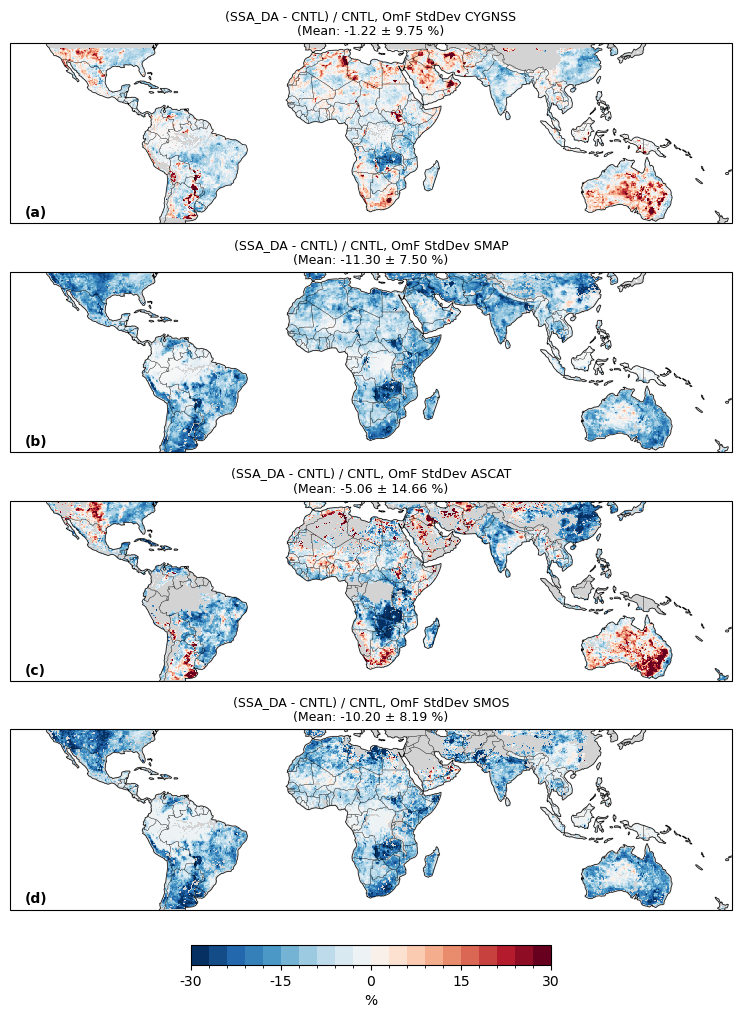

In [26]:
# 4-panel percent-difference maps for SSA_DA vs CNTL (OmF StdDev)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from common.python.plotting.geospatial_plotting import load_ease_grid, build_ease_grid_mapping

# Helper
def pct_diff(da, ol):
    return np.divide(da - ol, ol, out=np.full_like(ol, np.nan, dtype=float), where=ol != 0) * 100.0

map_array = np.empty([n_tile, 3]); map_array.fill(np.nan)
map_array[:,1] = lon; map_array[:,2] = lat
map_array = map_array.copy()

pct_maps_ssa = {
    'CYGNSS': pct_diff(group_metrics_DA_ssa['CYGNSS']['OmF_stdv'], group_metrics_OL['CYGNSS']['OmF_stdv']),
    'SMAP':   pct_diff(group_metrics_DA_ssa['SMAP']['OmF_stdv'],   group_metrics_OL['SMAP']['OmF_stdv']),
    'ASCAT':  pct_diff(group_metrics_DA_ssa['ASCAT']['OmF_stdv'],  group_metrics_OL['ASCAT']['OmF_stdv']),
    'SMOS':   pct_diff(group_metrics_DA_ssa['SMOS']['OmF_stdv'],   group_metrics_OL['SMOS']['OmF_stdv']),
}

panels = [
    ('CYGNSS', '(a)'),
    ('SMAP',   '(b)'),
    ('ASCAT',  '(c)'),
    ('SMOS',   '(d)'),
]

vmin, vmax = -30.0, 30.0
lats, lons = load_ease_grid(); lats_row, lons_col = lats[:,1], lons[1,:]
lon_grid, lat_grid = np.meshgrid(lons_col, lats_row)

fig, axes = plt.subplots(4, 1, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
for ax, (species, lab) in zip(axes, panels):
    data_1d = pct_maps_ssa[species]
    mean_val = np.nanmean(data_1d)
    std_val = np.nanstd(data_1d)
    map_array[:,0] = data_1d
    grid = build_ease_grid_mapping(map_array, lats_row, lons_col)
    sc = ax.pcolormesh(lon_grid, lat_grid, grid, cmap='RdBu_r', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
    ax.set_extent(REGION_BOUNDS['cygnss'], crs=ccrs.PlateCarree())
    ax.set_title(f'(SSA_DA - CNTL) / CNTL, OmF StdDev {species}\n(Mean: {mean_val:.2f} ± {std_val:.2f} %)', fontsize=9)
    ax.text(0.02, 0.02, lab, transform=ax.transAxes, fontsize=10, fontweight='bold', va='bottom', ha='left')
    ax.tick_params(labelbottom=False, labelleft=False)

# Shared colorbar
cax = fig.add_axes([0.35, 0.01, 0.30, 0.02])
edges = np.linspace(vmin, vmax, 21)
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap
cmap = get_cmap("RdBu_r", len(edges)-1)
norm = BoundaryNorm(edges, cmap.N)
sc.set_cmap(cmap); sc.set_norm(norm)
cbar = fig.colorbar(sc, cax=cax, orientation="horizontal")
cbar.set_ticks([-30, -15, 0, 15, 30])
cbar.ax.set_xticklabels(["-30", "-15", "0", "15", "30"])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('%', fontsize=10)
fig.tight_layout(rect=(0, 0.05, 1, 0.98))
plt.show()
